# Co-matrix study

* This study is based on the thesis of Mr. Desir Chesner, "Classification Automatique d’Images, Application à l’Imagerie du Poumon Profond", available at https://tel.archives-ouvertes.fr/tel-00879356/document
* We use the scikit-image package.
* As stated in https://www.nature.com/articles/s41598-017-04151-4https://www.nature.com/articles/s41598-017-04151-4, we should quantizate our images (we already use a 255 gray scale)
<br><br><br>

In [8]:
import matplotlib.pyplot as plt

We will start with a simple analysis of a typical sea texture with the file 'data/mer/ar54ff.png'.

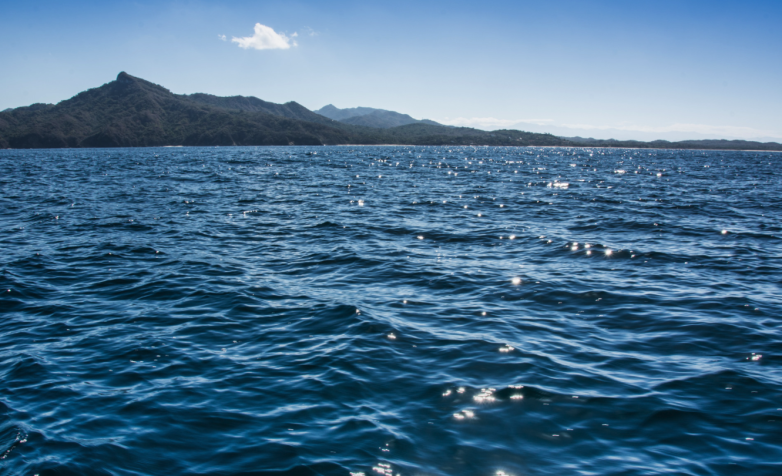

In [5]:
path = "../Data/Mer/ar54ff.png"

from IPython.display import Image, display
display(Image(filename=path, embed=True))

As stated in page 6 of the tutorial, Quantifying an image through textures is summarized through 3 major checkpoints :
* "*Grey Level differences (contrast)*"
* "*Defined size of area where change occurs (neighbourhood, defined by a window size)*"
* "*Directionality, or lack of it (omnidirectional)*"

<br><br><br>
### 1) Quantization of the image. 
If we want to have trustable results, we should quantize all of our images to the same gray levels. Our tutorial advice a value of 4. For an explanation, a higher value would both decrease the efficiency of texture analysis and increase the computation time.

In [6]:
QUANTIZATION_FACTOR = 4

def quantized(image_path):
    return Image.open(path).convert('L').quantize(QUANTIZATION_FACTOR)

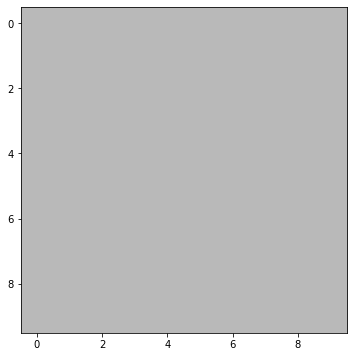

In [9]:
from PIL import Image

image = quantized(path)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.imshow(image.crop((400, 50, 410, 60)), cmap=plt.cm.gray, vmin=0, vmax=3)

<br><br>

### 2) Defining neighbourhood

Now we need to select some windows or views of particular areas of our image and apply the gray comatrix on them. It is important to choose the windows wisely

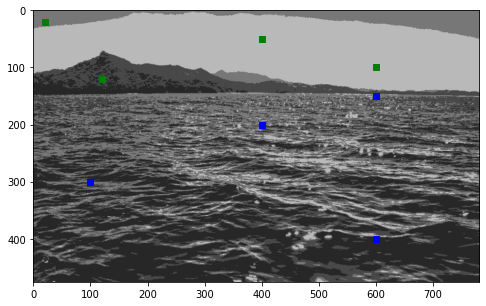

In [10]:
WINDOW_SIZE = 47 # we take an odd number for our view

sea_points = [(100, 300), (600, 400), (600, 150), (400, 200)]
other_points = [(20, 20), (400, 50), (120, 120), (600,100)]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=3)

for x, y in sea_points:
    ax.plot(x, y, 'bs')
for x, y in other_points:
    ax.plot(x, y, 'gs')

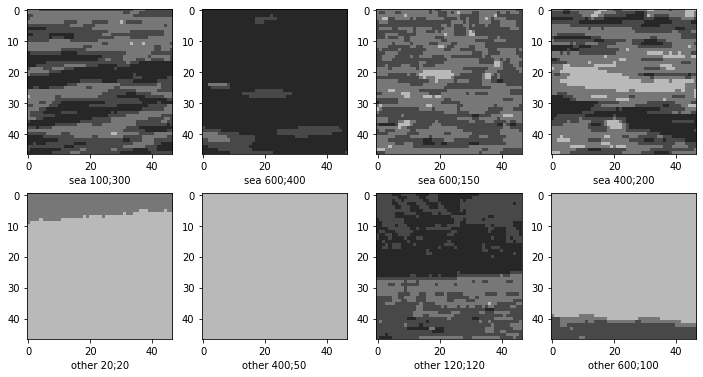

In [11]:
cropped_sea = [(image.crop((x, y, x + WINDOW_SIZE, y + WINDOW_SIZE)), (x, y)) for x, y in sea_points]
cropped_other = [(image.crop((x, y, x + WINDOW_SIZE, y + WINDOW_SIZE)), (x, y)) for x, y in other_points]

fig = plt.figure(figsize=(12, 13))

for k, (im, (x, y)) in enumerate(cropped_sea):
    ax = fig.add_subplot(4, 4, k + 1)
    ax.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=3)
    ax.set_xlabel(f'sea {x};{y}')
n = len(cropped_sea)
for k, (im, (x, y)) in enumerate(cropped_other):
    ax = fig.add_subplot(4, 4, n + k + 1)
    ax.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=3)
    ax.set_xlabel(f'other {x};{y}')

<br><br>

### 3) Defining directions
As a comatrix analyse the relationship between pixels, we have to define 1) the distance between pixels couple and 2) the direction we take the neighbour pixel. Ex: if the direction is north and the pixel is at 1;1, then his neighbour is at 1;2

In [12]:
import numpy as np

DISTANCE = 1
DIRECTION = 1/2 * np.pi # north in radian.

<br><br>

### Finaly, let's take a look at our graycomatrix

In [15]:
from skimage.feature import graycomatrix, graycoprops

GLCMs_sea = []
for im, (x, y) in cropped_sea:
    GLCMs_sea.append(graycomatrix(im, distances=[DISTANCE], angles=[DIRECTION], levels=4, symmetric=True, normed=True))
GLCMs_other = []
for im, (x, y) in cropped_other:
    GLCMs_other.append(graycomatrix(im, distances=[DISTANCE], angles=[DIRECTION], levels=4, symmetric=True, normed=True))

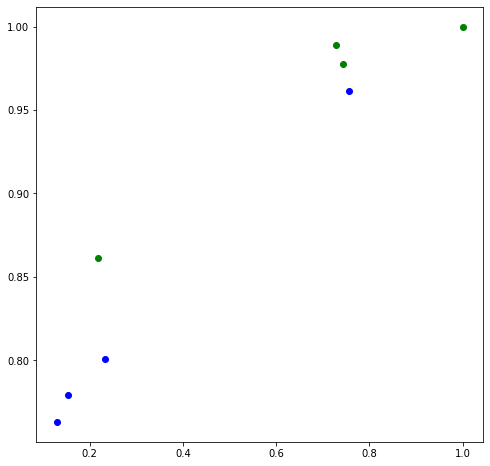

In [21]:
measures = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

for i, glcm in enumerate(GLCMs_sea):
    contrast = graycoprops(glcm, 'homogeneity')
    homogeneity = graycoprops(glcm, 'ASM')
    ax.plot(homogeneity, contrast, 'bo')
for i, glcm in enumerate(GLCMs_other):
    contrast = graycoprops(glcm, 'homogeneity')
    homogeneity = graycoprops(glcm, 'ASM')
    ax.plot(homogeneity, contrast, 'go')